# Projeto 9: Classificação de objetos (CIFAR-10)

- Base de dados: https://www.cs.toronto.edu/~kriz/cifar.html


# Etapa 1: Importação das bibliotecas

In [1]:
%tensorflow_version 2.x
import numpy as np
import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.15.0'

# Etapa 2: Carregamento da base de dados

In [2]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()#Loads the data

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

# Etapa 3: Visualização dos dados

[1]


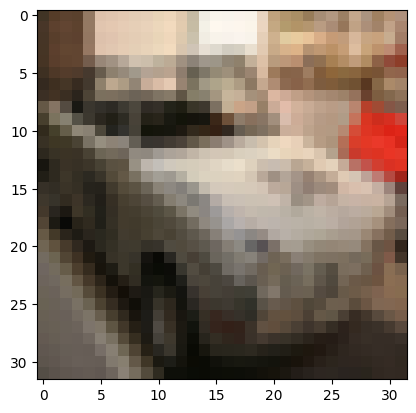

In [7]:
i = 302
plt.imshow(X_train[i])
print(y_train[i])

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


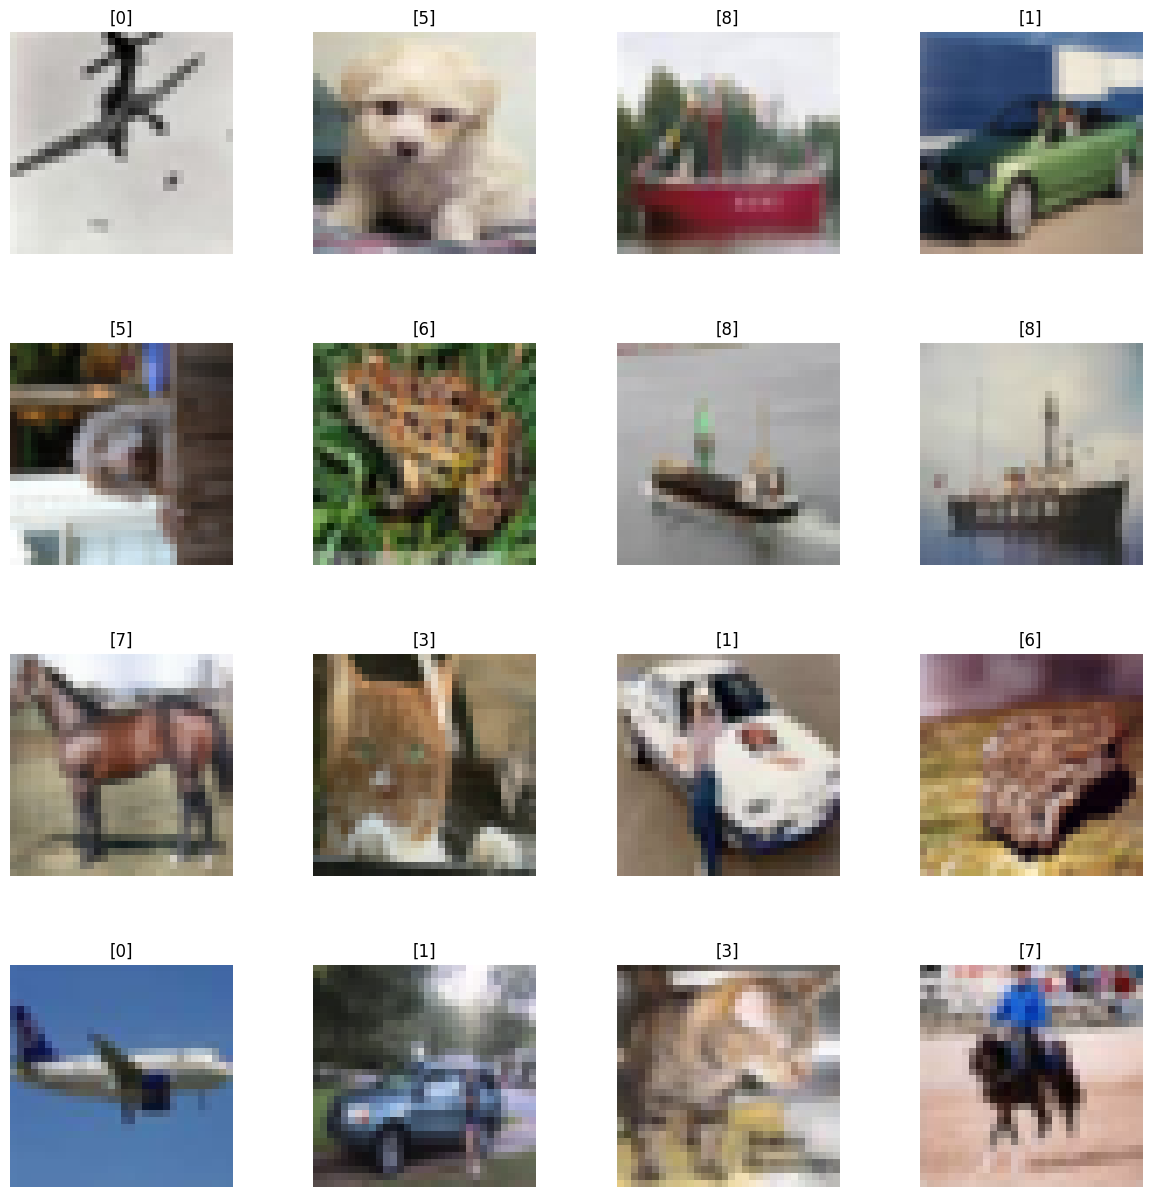

In [8]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4);

# Etapa 4: Preparação dos dados

In [9]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
number_categories = 10

In [14]:
y_train = tf.keras.utils.to_categorical(y_train, number_categories)# Put y_train in the One-hot encoder format

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [15]:
y_test = tf.keras.utils.to_categorical(y_test, number_categories)# Put y_test in the One-hot encoder format

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [16]:
X_train = X_train/255 #Put the pixel data in the 0 to 1 format
X_test = X_test/255 #Put the pixel data in the 0 to 1 format

In [ ]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
input_shape = X_train.shape[1:]

In [ ]:
input_shape

(32, 32, 3)

In [ ]:
y_train.shape

(50000, 10)

# Etapa 5: Construção e treinamento do modelo

In [18]:
cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))#Convolutional layer
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))#Convolutional layer
cnn.add(tf.keras.layers.MaxPooling2D(2,2))#Apply the avarage pooling
cnn.add(tf.keras.layers.Dropout(0.3))#Apply the dropout in the neurons to avoid the overfitting

cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))#Convolutional layer
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))#Convolutional layer
cnn.add(tf.keras.layers.MaxPooling2D(2,2))#Apply the avarage pooling
cnn.add(tf.keras.layers.Dropout(0.3))#Apply the dropout in the neurons to avoid the overfitting

cnn.add(tf.keras.layers.Flatten())#Apply the flattening, transforming the matrix of the image in a array to the training

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))#Apply the dropout in the neurons to avoid the overfitting

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        36928     
                                                      

In [20]:
cnn.compile(optimizer = tf.keras.optimizers.legacy.RMSprop(0.0001, decay = 1e-6), # 0.0000006
            loss ='categorical_crossentropy', metrics =['accuracy'])
#tf.keras.optimizers.legacy.RMSprop(0.0001, decay = 1e-6) => Informs that the correction step 0.0001 and after each epoch
#multiply the step velocity by 1e-6 to decrease the velocity of the step correction

In [21]:
epochs = 100
history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)

Epoch 1/100
98/98 [==============================] - 10s 44ms/step - loss: 2.0648 - accuracy: 0.2457
Epoch 2/100
98/98 [==============================] - 3s 35ms/step - loss: 1.8127 - accuracy: 0.3461
Epoch 3/100
98/98 [==============================] - 4s 36ms/step - loss: 1.7095 - accuracy: 0.3821
Epoch 4/100
98/98 [==============================] - 4s 39ms/step - loss: 1.6486 - accuracy: 0.4061
Epoch 5/100
98/98 [==============================] - 4s 36ms/step - loss: 1.5972 - accuracy: 0.4262
Epoch 6/100
98/98 [==============================] - 3s 35ms/step - loss: 1.5476 - accuracy: 0.4414
Epoch 7/100
98/98 [==============================] - 4s 40ms/step - loss: 1.5057 - accuracy: 0.4579
Epoch 8/100
98/98 [==============================] - 4s 37ms/step - loss: 1.4739 - accuracy: 0.4690
Epoch 9/100
98/98 [==============================] - 4s 36ms/step - loss: 1.4421 - accuracy: 0.4804
Epoch 10/100
98/98 [==============================] - 3s 35ms/step - loss: 1.4108 - accuracy: 0.494

# Etapa 6: Avaliação do modelo

In [22]:
evaluation = cnn.evaluate(X_test, y_test)#Evaluate the neural network
print('Test Accuracy: {}'.format(evaluation[1]))#Show the accurace

313/313 [==============================] - 2s 3ms/step - loss: 0.6977 - accuracy: 0.7693
Test Accuracy: 0.7692999839782715


In [29]:
predicted_probabilities = cnn.predict(X_test)# Test the neural network
predicted_classes = np.argmax(predicted_probabilities, axis=1)
predicted_classes

313/313 [==============================] - 1s 3ms/step


array([3, 8, 8, ..., 5, 1, 7])

In [23]:
y_test=y_test.argmax(1)

In [24]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

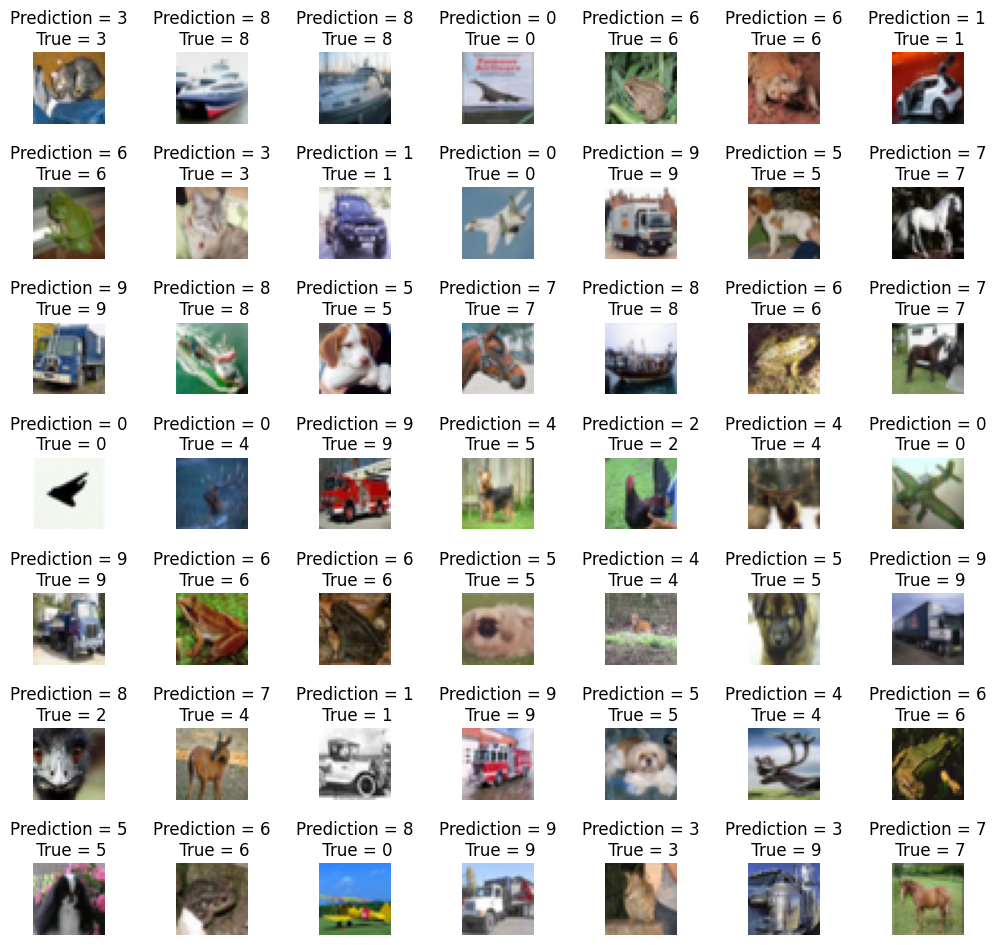

In [30]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

<Axes: >

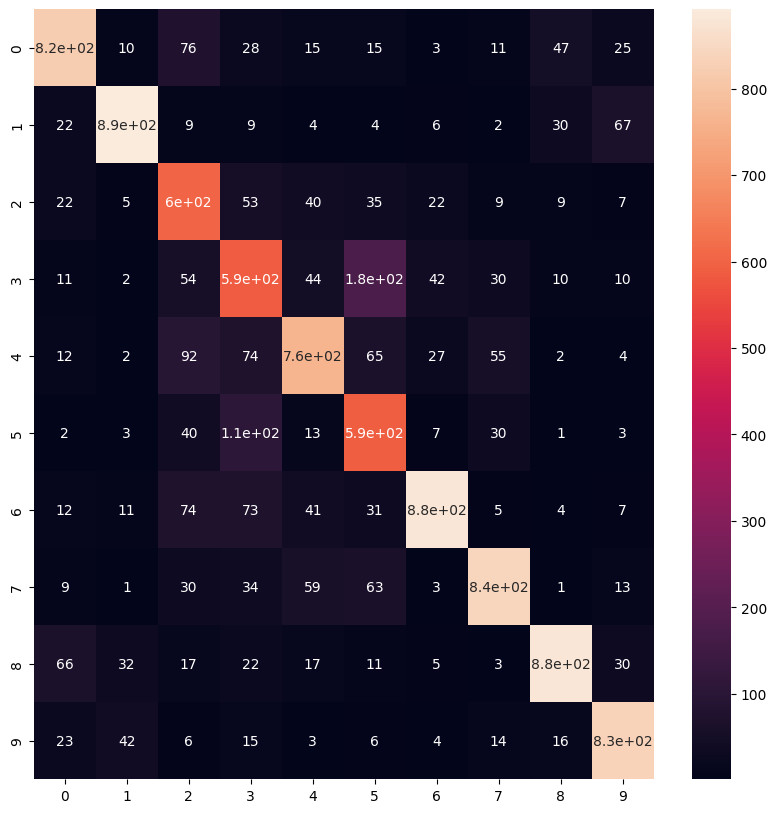

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predicted_classes, y_test)#Set the confusion matrix
plt.figure(figsize = (10, 10))#Set the size
sns.heatmap(cm, annot = True)#Show it

In [ ]:
cm

array([[787,   7,  67,  17,  17,  16,   7,  10,  46,  19],
       [ 32, 901,  10,  14,   5,   6,  11,   5,  43,  80],
       [ 25,   3, 621,  46,  45,  24,  36,  14,   9,   8],
       [ 13,   6,  71, 607,  65, 177,  68,  42,  10,   8],
       [ 11,   0,  89,  53, 735,  39,  41,  33,   3,   1],
       [  8,   3,  51, 137,  24, 658,  17,  40,   5,   3],
       [  7,   6,  34,  34,  22,  11, 789,   1,   3,   5],
       [  9,   1,  30,  43,  72,  55,   9, 833,   2,   8],
       [ 68,  19,  16,  24,   9,   6,  11,   4, 857,  23],
       [ 40,  54,  11,  25,   6,   8,  11,  18,  22, 845]])